In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,42000.0,4.456643,2.887730,0.0,2.0,4.0,7.0,9.0
pixel0,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel1,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel2,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel3,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
pixel779,42000.0,0.002857,0.414264,0.0,0.0,0.0,0.0,62.0
pixel780,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel781,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel782,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [5]:
X = df.drop('label', axis=1).values
Y = df[['label']].values

(-0.5, 27.5, 27.5, -0.5)

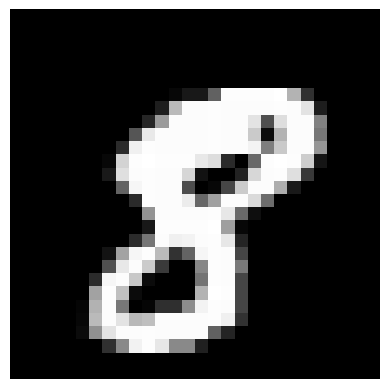

In [6]:
plt.imshow(X[10].reshape(28,28), cmap='gray')
plt.axis('off')

In [7]:
np.set_printoptions(linewidth = 300)
print(X[1].reshape(28,28))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18  30 137 137 192  86  72   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  13  86 250 254 254 254 254 217 246 151  32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  16 179 254 254 254 254 254 254 254 254 254 231  54  15   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  72 254 254 254 254 254 254 254 254 254 254 254 254 104   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  61 191 254 254 254 254 254 109  83 199 254 254 254 25

### let visualize the digits

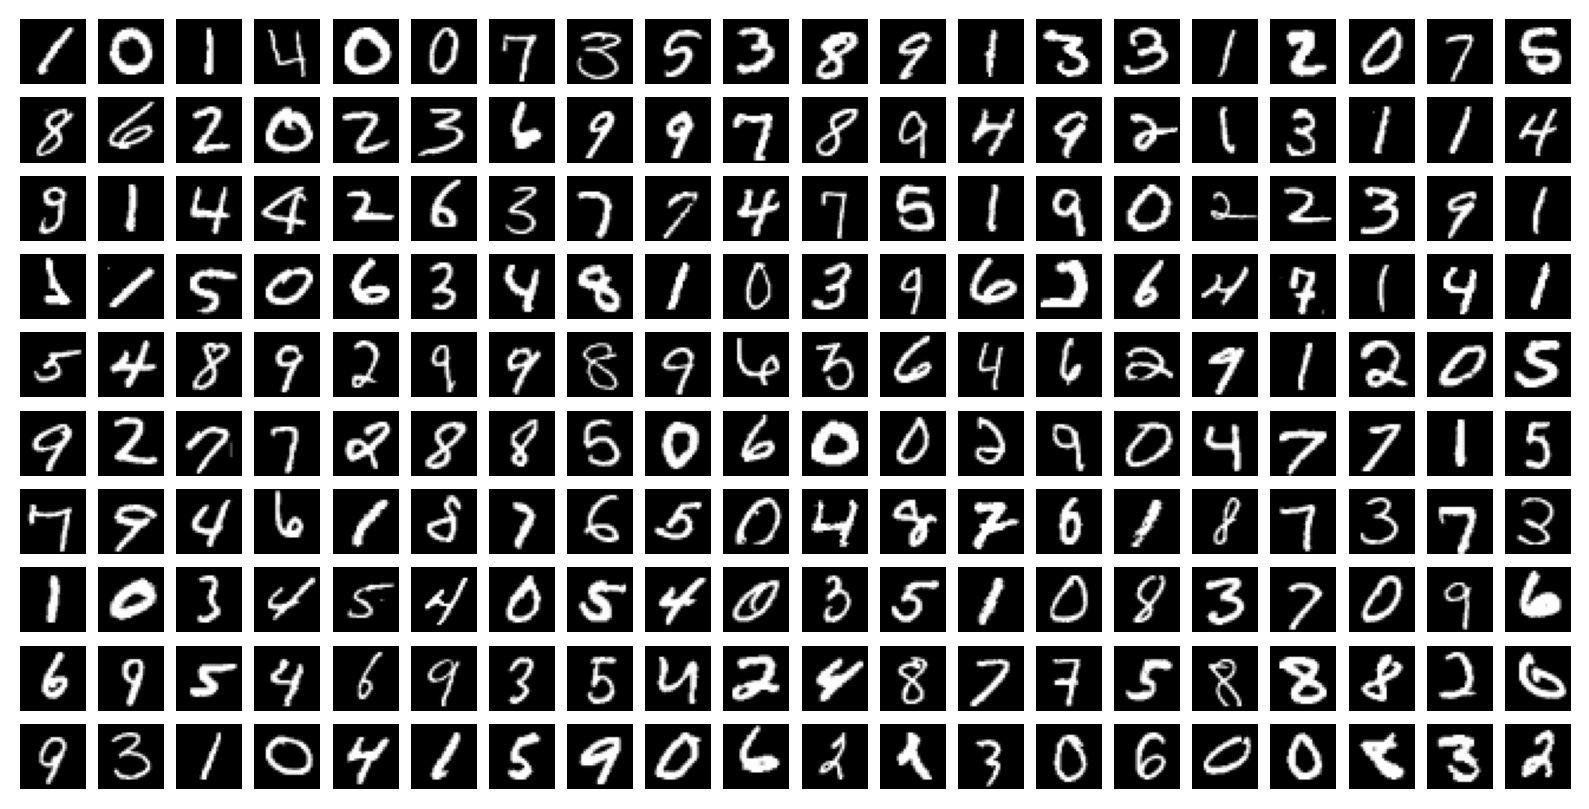

In [8]:
plt.figure(figsize=(10,5), dpi=200)
for i in range(0,200):
    plt.subplot(10,20,i+1)
    plt.imshow(X[i].reshape(28,28), cmap='gray')
    plt.axis('off')

Normalize the X

In [14]:
X=X/255

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=2 )

In [16]:
print("Training Data shape : ", X_train.shape)
print("Training labels shape : ", Y_train.shape)
print("Testing Data shape : ", X_test.shape)
print("Testing labels shape : ", Y_test.shape)

Training Data shape :  (29400, 784)
Training labels shape :  (29400, 1)
Testing Data shape :  (12600, 784)
Testing labels shape :  (12600, 1)


### ==============================================================
## Decision Tree Classifier
DecisionTreeClassifier(
>      class_weight=None, criterion='entropy', max_depth=8
       max_features=None, max_leaf_nodes=None,
       min_impurity_decrease=0.0, min_impurity_split=None,
       min_samples_leaf=1, min_samples_split=2,
       min_weight_fraction_leaf=0.0, presort=False,
       random_state=14, splitter='best')

In [42]:
# not ensemble 
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier( max_depth=8, random_state=2)
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=8, random_state=2)

In [43]:
pred_train = dt_classifier.predict(X_train)
pred_test = dt_classifier.predict(X_test)

print("Training set Accurcy : ", accuracy_score(Y_train, pred_train))
print("Testing set Accurcy  : ", accuracy_score(Y_test, pred_test))

Training set Accurcy :  0.8394557823129252
Testing set Accurcy  :  0.8065079365079365


In [48]:
#Bagging
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=12, random_state=2)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(max_depth=12, n_estimators=50, random_state=2)

In [49]:
pred_train = rf_classifier.predict(X_train)
pred_test = rf_classifier.predict(X_test)

print("Training set Accurcy : ", accuracy_score(Y_train, pred_train))
print("Testing set Accurcy  : ", accuracy_score(Y_test, pred_test))

Training set Accurcy :  0.9920408163265306
Testing set Accurcy  :  0.9491269841269842


 ## XGBoost

In [51]:
# Boosting ensemble
from xgboost import XGBClassifier
xg_classifier = XGBClassifier(n_estimators=50)
xg_classifier.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [52]:
pred_train = xg_classifier.predict(X_train)
pred_test = xg_classifier.predict(X_test)

print("Training set Accurcy : ", accuracy_score(Y_train, pred_train))
print("Testing set Accurcy  : ", accuracy_score(Y_test, pred_test))

Training set Accurcy :  0.9999659863945578
Testing set Accurcy  :  0.9692857142857143


## LightGBM

In [57]:
from lightgbm import LGBMClassifier
lg_classifier = LGBMClassifier(n_estimators=50)
lg_classifier.fit(X_train,Y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.105867 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 101198
[LightGBM] [Info] Number of data points in the train set: 29400, number of used features: 611
[LightGBM] [Info] Start training from score -2.316974
[LightGBM] [Info] Start training from score -2.205730
[LightGBM] [Info] Start training from score -2.307700
[LightGBM] [Info] Start training from score -2.268479
[LightGBM] [Info] Start training from score -2.346032
[LightGBM] [Info] Start training from score -2.401917
[LightGBM] [Info] Start training from score -2.308726
[LightGBM] [Info] Start training from score -2.254443
[LightGBM] [Info] Start training from score -2.324942
[LightGBM] [Info] Start training from score -2.303606


LGBMClassifier(n_estimators=50)

In [58]:
pred_train = lg_classifier.predict(X_train)
pred_test = lg_classifier.predict(X_test)

print("Training set Accurcy : ", accuracy_score(Y_train, pred_train))
print("Testing set Accurcy  : ", accuracy_score(Y_test, pred_test))

Training set Accurcy :  0.9999659863945578
Testing set Accurcy  :  0.9653968253968254


## ADABoost

In [60]:
estimator = DecisionTreeClassifier(max_depth=8 , max_features=500)
from sklearn.ensemble import AdaBoostClassifier
ad_classifier= AdaBoostClassifier(estimator, n_estimators=100)
ad_classifier.fit(X_train, Y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=8,
                                                    max_features=500),
                   n_estimators=100)

In [61]:
pred_train = ad_classifier.predict(X_train)
pred_test  = ad_classifier.predict(X_test)

print("Training set Accurcy : ", accuracy_score(Y_train, pred_train))
print("Testing set Accurcy  : ", accuracy_score(Y_test, pred_test))

Training set Accurcy :  0.9938775510204082
Testing set Accurcy  :  0.9453968253968253


## Stacking Ensemble

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [23]:
dt_classifier  = DecisionTreeClassifier(max_depth=12)
rf_classifier  = RandomForestClassifier(n_estimators=100, max_depth=100)
knn_classifier = KNeighborsClassifier(n_neighbors=6)
lg_classifier  = LGBMClassifier(n_estimators=50)
xg_classifier  = XGBClassifier(n_estimators=50)

In [26]:
from sklearn.ensemble import VotingClassifier
v_classifier = VotingClassifier(estimators = [('dt',  dt_classifier),
                                              ('rf',  rf_classifier),
                                              ('knn', knn_classifier),
                                              ('lg',  lg_classifier),
                                              ('xg',  xg_classifier)], voting='hard')
v_classifier.fit(X_train, Y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.090572 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 101198
[LightGBM] [Info] Number of data points in the train set: 29400, number of used features: 611
[LightGBM] [Info] Start training from score -2.316974
[LightGBM] [Info] Start training from score -2.205730
[LightGBM] [Info] Start training from score -2.307700
[LightGBM] [Info] Start training from score -2.268479
[LightGBM] [Info] Start training from score -2.346032
[LightGBM] [Info] Start training from score -2.401917
[LightGBM] [Info] Start training from score -2.308726
[LightGBM] [Info] Start training from score -2.254443
[LightGBM] [Info] Start training from score -2.324942
[LightGBM] [Info] Start training from score -2.303606


VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=12)),
                             ('rf', RandomForestClassifier(max_depth=100)),
                             ('knn', KNeighborsClassifier(n_neighbors=6)),
                             ('lg', LGBMClassifier(n_estimators=50)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [27]:
pred_train = v_classifier.predict(X_train)
pred_test  = v_classifier.predict(X_test)

print("Training set Accurcy : ", accuracy_score(Y_train, pred_train))
print("Testing set Accurcy  : ", accuracy_score(Y_test, pred_test))

Training set Accurcy :  0.9999659863945578
Testing set Accurcy  :  0.9711111111111111
